# DATA IMPORTATION

In [1]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
from dfply import *
import os
import warnings
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#packages for the modeling and predictions
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt', low_memory=False)
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

From the above we can see that there are no missing values in our given dataset.

In [5]:
fruits.describe().T

,count,mean,std,min,25%,50%,75%,max
fruit_label,59.0,2.542373,1.208048,1.00,1.00,3.00,4.00,4.00
mass,59.0,163.118644,55.018832,76.00,140.00,158.00,177.00,362.00
width,59.0,7.105085,0.816938,5.80,6.60,7.20,7.50,9.60
height,59.0,7.693220,1.361017,4.00,7.20,7.60,8.20,10.50
color_score,59.0,0.762881,0.076857,0.55,0.72,0.75,0.81,0.93


In [6]:
print(fruits.shape)

(59, 7)


From the above we can see that we have a total of 59 observation and 9 features or columns from the fruits dataset.

In [7]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

Also from the above output we can see that we have a total of 4 fruit type from the dataset.
they are Apple, Mandarin, Orange and Lemon.

###  distribution of Fruit type 

In [325]:
 fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

This dataset is balanced except for the mandarin type with lesser observations(5).

#### Bar plot of the Fruit Types

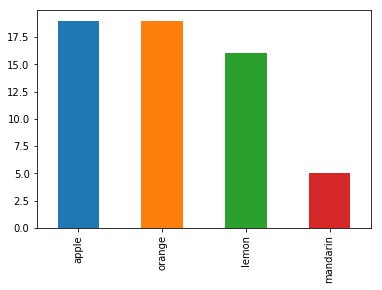

In [11]:
fname = fruits['fruit_name'].value_counts()
fname.plot.bar()

#### A box plot for each numeric variable.

This box will give us a clearer idea of the distribution of the numeric input variables

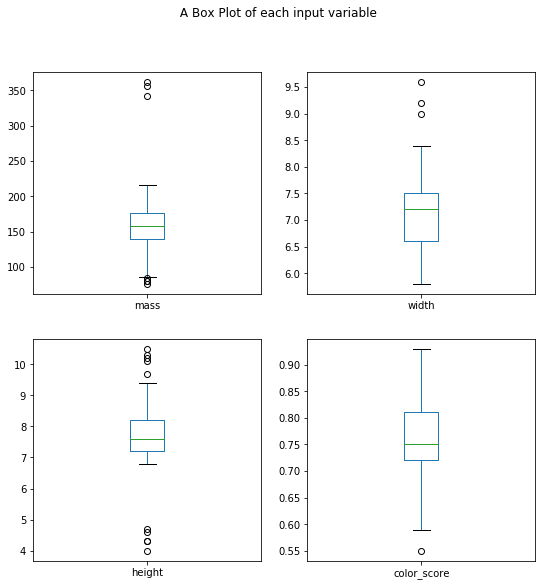

In [12]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, 
            layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
            title=' A Box Plot of each input variable')
plt.show()

#### A Histogram  for each numeric variable.

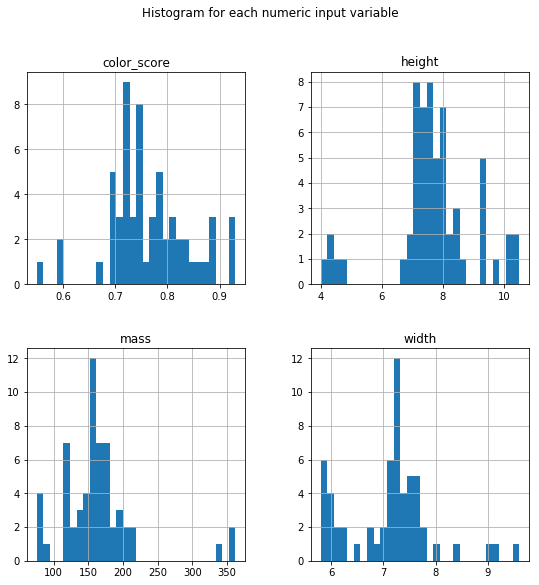

In [13]:
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

From the plot above, we can infer to say that, the "color score" is near to Gaussian distribution.

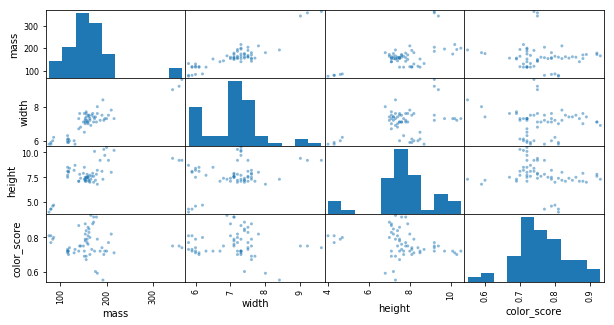

In [329]:
scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

#### from the scatter plot of all the numerical variables, we can say that 
#### Some pairs of attributes are correlated (mass and width). 
#### This suggests a high correlation and a predictable relationship

In [46]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [45]:
def plot_mushroom_b(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

# MODELING OF THE PROBLEM

### Spliting data set into training and Testing

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Since they are not of the same scale, We  scalle the numeric variables 

In [48]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.fit_transform(X_test) 

## Building the Models

We will be using diiferent model for the problem modeling and we will compare there performace and pick the best performing model.

### KNN

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93


In [51]:
#plot_mushroom_b(X_test, y_test, knn)

### Decision Tree

In [43]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


plot_mushroom_b(X_test, y_test, clf)

In [28]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.60


### Logistic Regression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.33


### Linear Discriminant Analysis

In [31]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.60


### Gaussian Naive Bayes

In [32]:
Naive = GaussianNB()
Naive.fit(X_train, y_train)
print('Accuracy of Naive classifier on training set: {:.2f}'
     .format(Naive.score(X_train, y_train)))
print('Accuracy of Naive classifier on test set: {:.2f}'
     .format(Naive.score(X_test, y_test)))

Accuracy of Naive classifier on training set: 0.86
Accuracy of Naive classifier on test set: 0.67


### Support Vector Machine

In [33]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.87


The KNN algorithm appears to be the most accurate model that we tried. The confusion matrix provides an indication of one error made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (However, the test set was small).

In [34]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 7 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       0.67      1.00      0.80         2

   micro avg       0.93      0.93      0.93        15
   macro avg       0.92      0.97      0.93        15
weighted avg       0.96      0.93      0.94        15

